## **載入必要套件**

In [1]:
import numpy as np 
import pandas as pd 
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/introml-nccu-2024-task-1/introml_2024_task1_train.csv
/kaggle/input/introml-nccu-2024-task-1/introml_2024_task1_test_NO_answers_shuffled.csv
/kaggle/input/introml-nccu-2024-task-1/introml_2024_task1_test_sample_submissions.csv


## **讀取資料**

In [2]:
data = pd.read_csv('/kaggle/input/introml-nccu-2024-task-1/introml_2024_task1_train.csv')
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f11,f12,f13,f14,f15,f16,f17,f18,f19,class
0,f01,f11,f21,f31,f40,f50,f61,f71,f81,f90,...,f111,f121,f130,f141,f150,f161,f170,f181,f191,C0
1,f00,f10,f21,f31,f40,f51,f60,f71,f81,f91,...,f111,f121,f131,f141,f150,f161,f170,f181,f191,C0
2,f01,f10,f21,f30,f40,f50,f61,f71,f81,f90,...,f111,f121,f131,f141,f150,f161,f170,f181,f191,C0
3,f00,f10,f21,f30,f40,f51,f60,f71,f80,f90,...,f111,f121,f130,f140,f150,f161,f171,f181,f191,C0
4,f00,f11,f21,f30,f40,f50,f60,f71,f81,f90,...,f111,f121,f131,f141,f151,f161,f170,f181,f191,C0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,f00,f10,f21,f31,f40,f50,f60,f70,f80,f90,...,f111,f121,f131,f140,f150,f160,f171,f180,f190,C2
2396,f01,f10,f21,f30,f40,f51,f60,f70,f80,f90,...,f111,f121,f131,f141,f150,f160,f171,f180,f191,C2
2397,f00,f11,f21,f31,f41,f51,f60,f71,f81,f90,...,f111,f121,f131,f140,f150,f160,f170,f180,f190,C2
2398,f00,f11,f21,f31,f41,f51,f60,f71,f80,f91,...,f111,f121,f131,f141,f150,f161,f170,f181,f191,C2


## **資料預處理**

In [3]:
# 初始化 OrdinalEncoder
encoder = OrdinalEncoder()

# 對整個 DataFrame 進行編碼
encoded_data = encoder.fit_transform(data)
target_names = encoder.categories_[0]
# 轉回 DataFrame 並加上列名
encoded_df = pd.DataFrame(encoded_data, columns=data.columns)

# 查看編碼後的數據
print(encoded_df)

       f0   f1   f2   f3   f4   f5   f6   f7   f8   f9  ...  f11  f12  f13  \
0     1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  ...  1.0  1.0  0.0   
1     0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2     1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  ...  1.0  1.0  1.0   
3     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  1.0  1.0  0.0   
4     0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  1.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2395  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   
2396  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   
2397  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  ...  1.0  1.0  1.0   
2398  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  ...  1.0  1.0  1.0   
2399  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  1.0  1.0   

      f14  f15  f16  f17  f18  f19  class  
0     1.0  0.0  1.0

In [4]:
X = encoded_df.iloc[:, :-1]
y = encoded_df['class']

## **資料視覺化**

In [5]:
# 計算卡方檢驗和 ANOVA 的結果
chi2_vals, p_vals_chi2 = chi2(X, y)
f_vals, p_vals_f = f_classif(X, y)

# 將結果整理成表格
results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2": chi2_vals,
    "Chi2_pval": p_vals_chi2,
    "F_value": f_vals,
    "F_pval": p_vals_f
})

# 篩選出 p-value 小於 0.05 的特徵
significant_results = results[(results["Chi2_pval"] < 0.05)]

# 印出篩選後的結果
print(significant_results)

   Feature        Chi2     Chi2_pval     F_value         F_pval
0       f0  140.038217  3.900207e-31   93.817433   5.911522e-40
1       f1   92.524203  8.102603e-21   75.927487   1.065383e-32
2       f2   23.964179  6.255249e-06   78.465186   9.819492e-34
3       f3   66.245333  4.121057e-15   65.683330   1.691737e-28
4       f4   62.311724  2.945649e-14   46.308144   1.851132e-20
5       f5   44.278571  2.426780e-10   35.011623   1.029220e-15
6       f6  447.975806  5.287978e-98  444.443917  6.665561e-165
7       f7   91.501214  1.351338e-20  166.032409   2.948077e-68
8       f8  175.664309  7.161105e-39  314.541233  4.972203e-122
9       f9  210.613757  1.844182e-46  155.586001   2.948904e-64
10     f10   20.716698  3.172679e-05   13.448078   1.556316e-06
11     f11   23.235890  9.003069e-06   91.677105   4.309889e-39
13     f13   12.606498  1.830348e-03   20.828541   1.076423e-09
14     f14   48.601399  2.794733e-11  118.295982   1.011056e-49
15     f15   77.511673  1.474192e-17   7

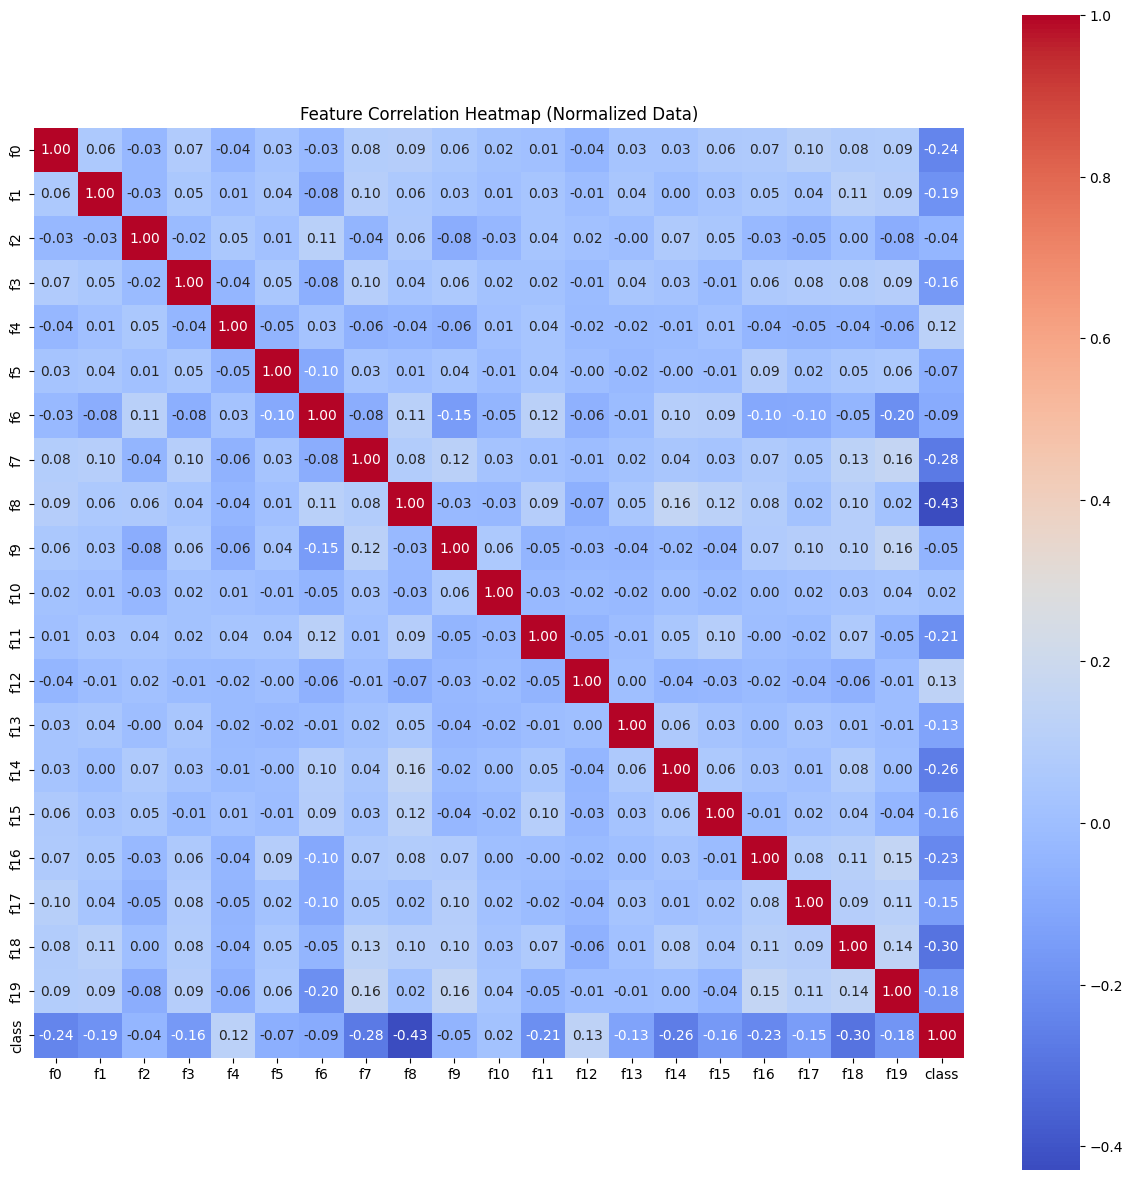

In [6]:
# 創建 MinMaxScaler 對數據進行歸一化
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)

# 計算皮爾森相關性矩陣
correlation_matrix = normalized_data.corr()

# 繪製熱圖
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap (Normalized Data)")
plt.show()


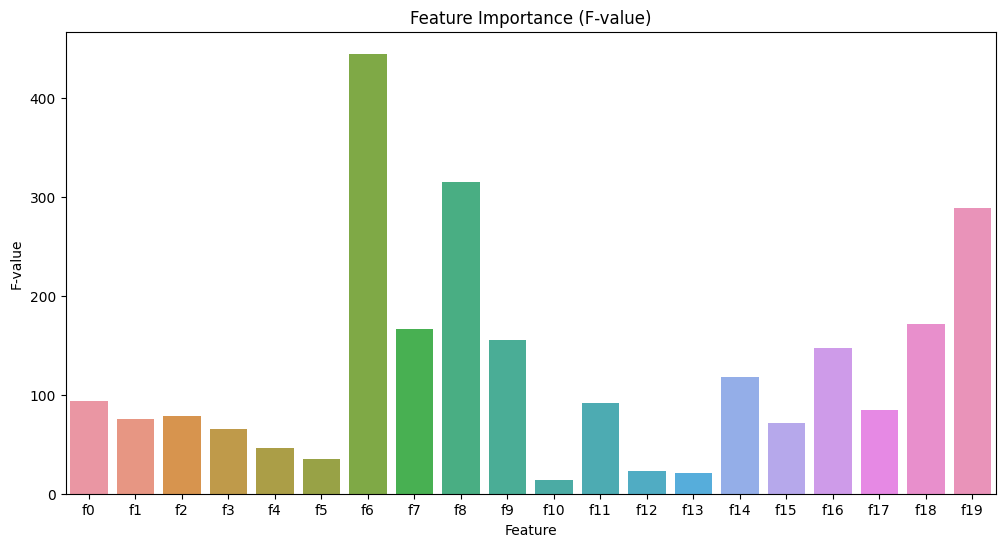

In [7]:
# 繪製條形圖，展示 F 值（代表區分能力）
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature", y="F_value", data=results)
plt.title("Feature Importance (F-value)")
plt.ylabel("F-value")
plt.xlabel("Feature")
plt.show()


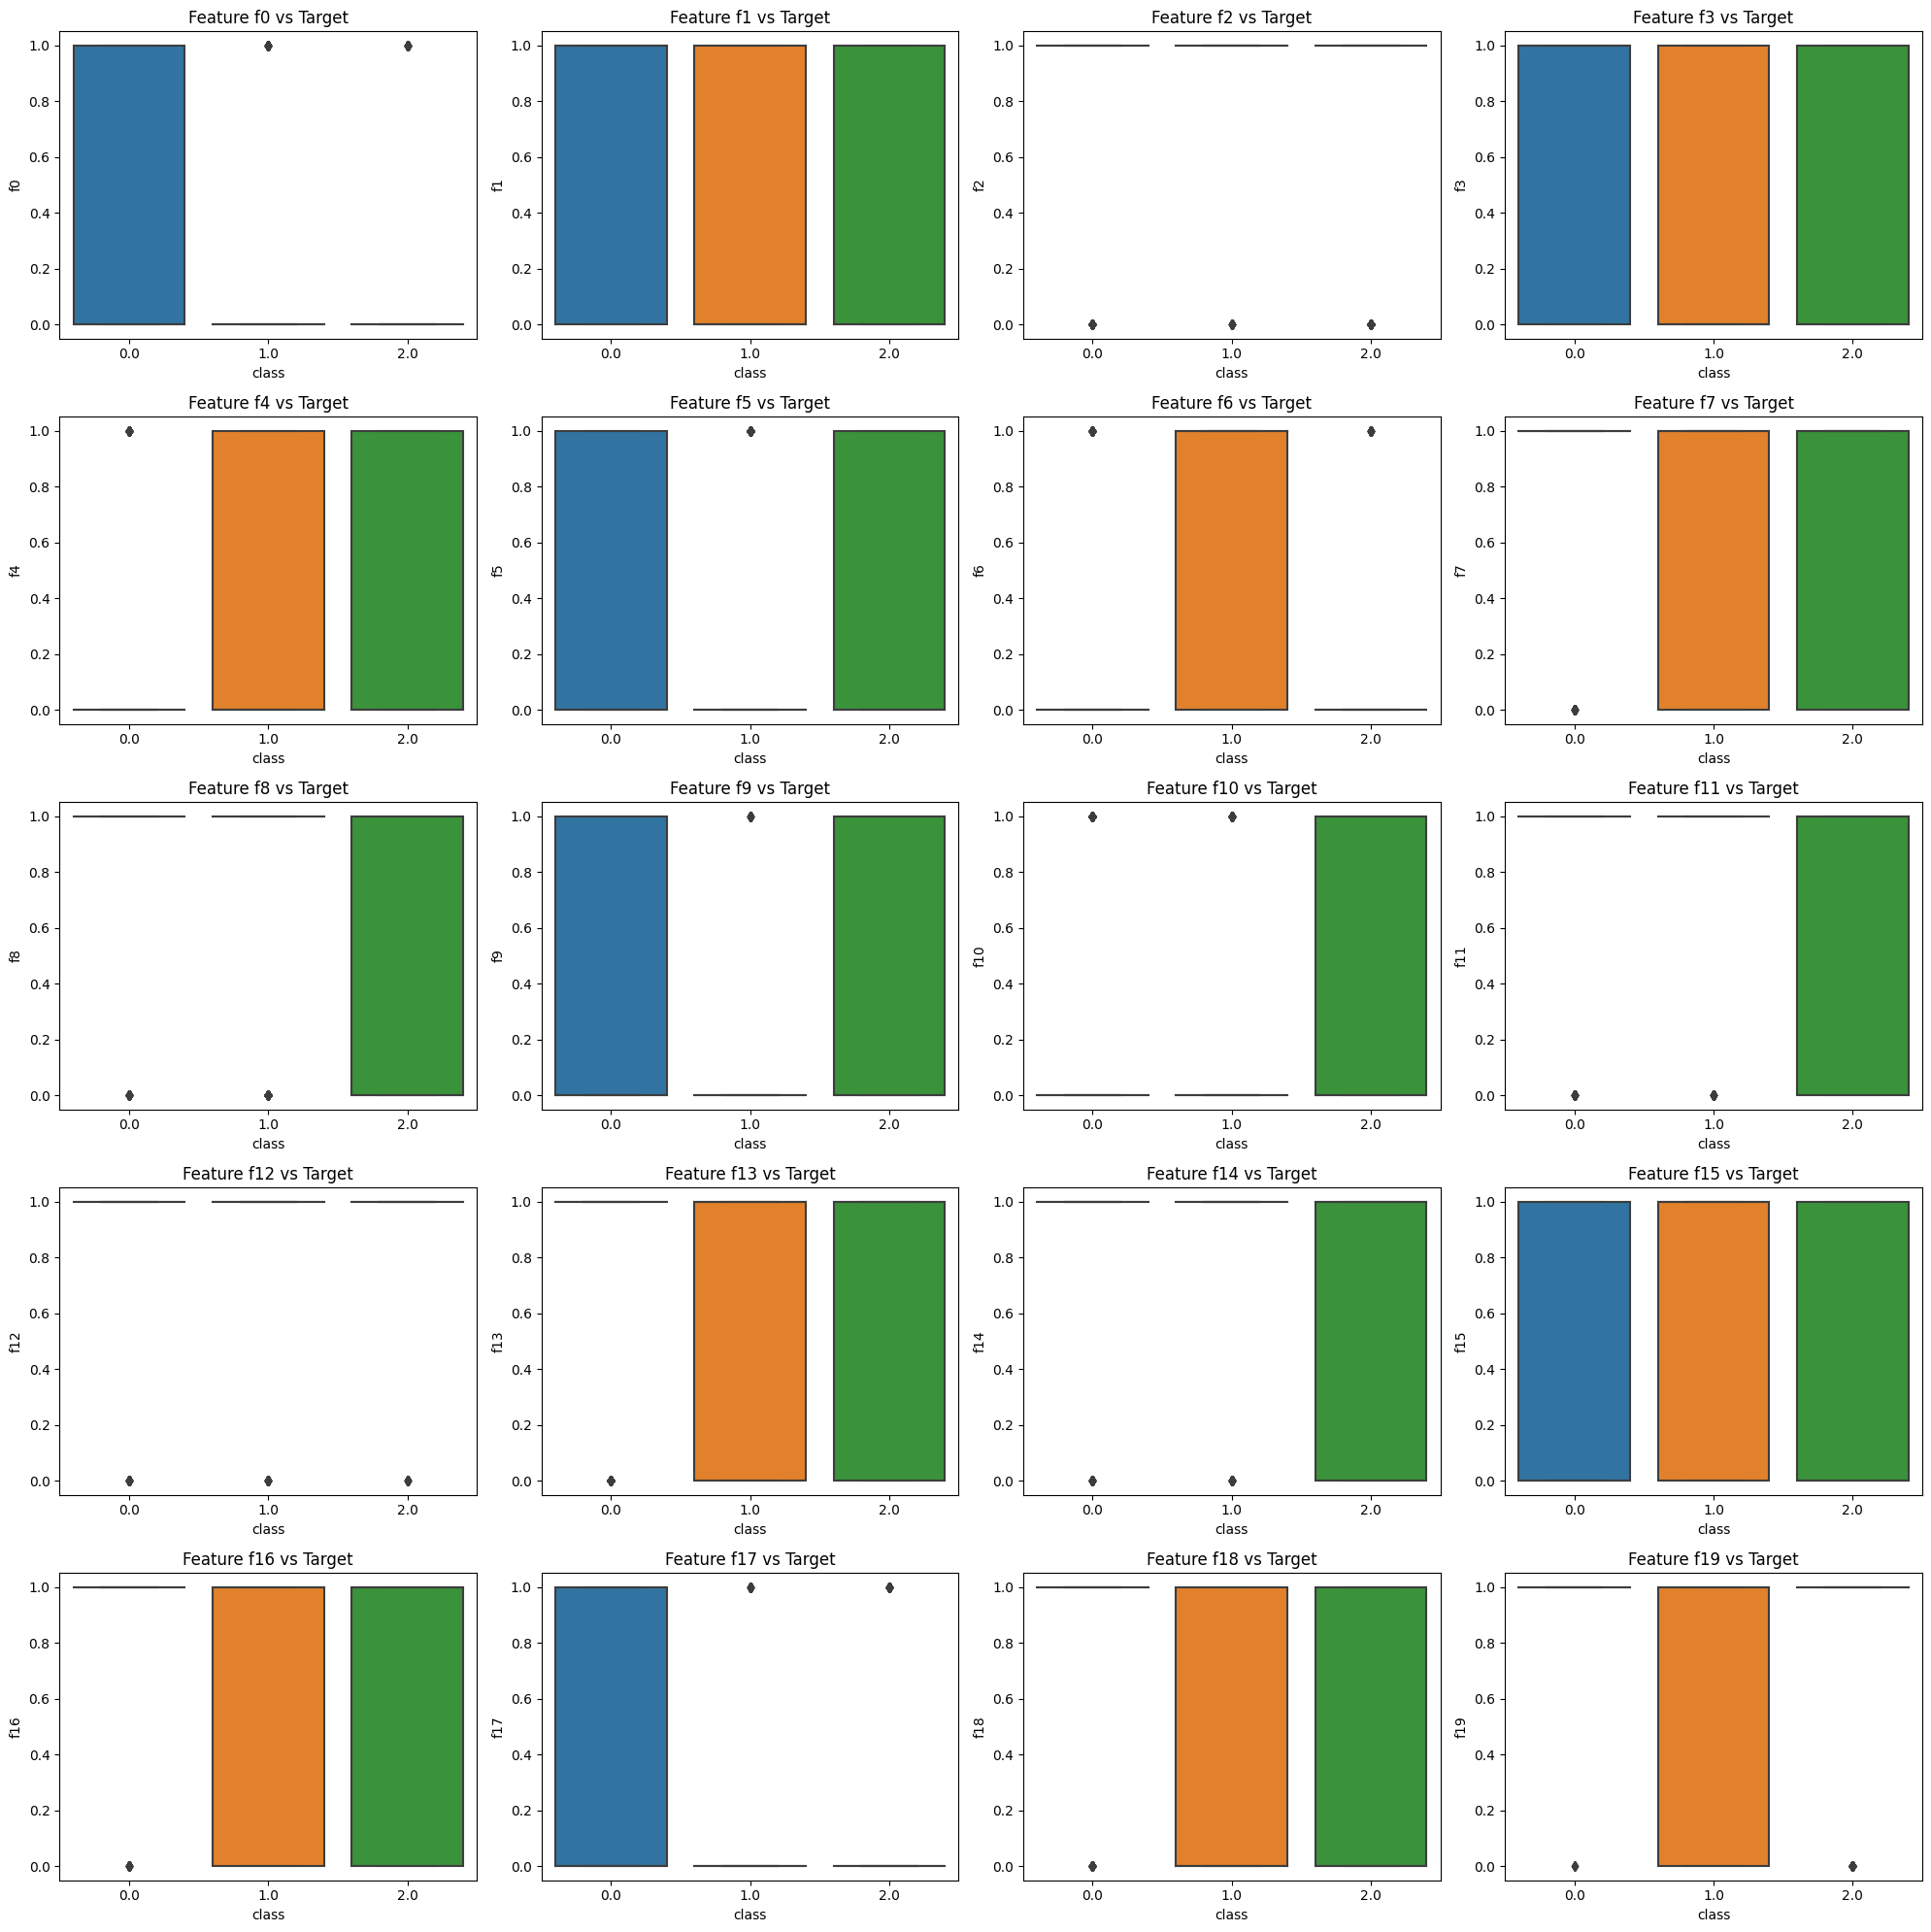

In [8]:
import math

# 設置每行顯示的圖數
cols_per_row = 4
num_features = len(X.columns)
num_rows = math.ceil(num_features / cols_per_row)

# 建立子圖
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, num_rows * 4))
axes = axes.flatten()  # 展平多維陣列方便迭代

# 繪製每個特徵的箱形圖
for idx, col in enumerate(X.columns):
    sns.boxplot(x="class", y=col, data=encoded_df, ax=axes[idx])
    axes[idx].set_title(f"Feature {col} vs Target")

# 隱藏多餘的子圖框
for idx in range(len(X.columns), len(axes)):
    axes[idx].axis("off")

# 調整間距
plt.tight_layout()
plt.show()


In [9]:
X = X.drop(columns=['f12'])
X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f13,f14,f15,f16,f17,f18,f19
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2396,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2397,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2398,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0


In [10]:
# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# 訓練分類模型
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

In [12]:
# 評估模型
unique_classes = sorted(set(y_test))
target_names = [f"Class {int(cls)}" for cls in unique_classes]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.79375

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.80      0.81      0.80       160
     Class 1       0.81      0.80      0.81       160
     Class 2       0.77      0.78      0.77       160

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



In [13]:
test = pd.read_csv('/kaggle/input/introml-nccu-2024-task-1/introml_2024_task1_test_NO_answers_shuffled.csv')
test

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19
0,0,f00,f10,f21,f31,f41,f50,f61,f71,f80,...,f100,f110,f121,f130,f140,f151,f161,f170,f180,f191
1,1,f00,f10,f21,f31,f41,f50,f61,f71,f81,...,f101,f111,f120,f131,f141,f151,f160,f170,f181,f190
2,2,f00,f10,f21,f30,f40,f51,f61,f70,f81,...,f100,f111,f121,f131,f141,f150,f160,f170,f181,f190
3,3,f00,f10,f21,f30,f41,f51,f60,f71,f80,...,f101,f111,f121,f130,f141,f150,f160,f170,f181,f191
4,4,f00,f10,f20,f31,f40,f50,f60,f71,f81,...,f100,f111,f121,f130,f140,f150,f161,f170,f181,f191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,f01,f10,f21,f30,f41,f50,f60,f70,f81,...,f100,f111,f121,f131,f141,f150,f160,f171,f180,f191
596,596,f00,f11,f21,f30,f40,f50,f60,f71,f81,...,f100,f111,f121,f131,f141,f150,f161,f170,f181,f191
597,597,f00,f10,f21,f30,f40,f50,f60,f71,f81,...,f100,f111,f121,f130,f141,f151,f160,f171,f181,f191
598,598,f00,f10,f21,f30,f40,f50,f60,f70,f81,...,f100,f111,f121,f131,f141,f150,f160,f170,f180,f191
